In [1]:
# Dependencies

from flask import Flask, render_template, send_file
import pandas as pd
import matplotlib.pyplot as plt
import io

In [2]:
# Initialize Flask app
app = Flask(__name__)

In [3]:

# Load the CSV file into a DataFrame
df = pd.read_csv('resources/netflix_titles.csv')

# Display the first few rows of the DataFrame to check the data
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
# 5. Who are the directors that occur most frequently in the top 3 popular genres on Netflix? 

#What are the top 3 genres? 
#What director specializes in the most popular genre?
#What director specializes in the 2nd most popular genre?
#What director specializes in the 3rd most popular genre?


#Who is the director that has directed the most amount of shows/movies in the most popular genre? 
#Who is the director that has directed the most amount of shows/movies in the 2nd most popular genre? 
#Who is the director that has directed the most amount of shows/movies in the 3rd most popular genre? 

In [5]:
# Display the column names
print("Column Names:", df.columns.tolist())

Column Names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [6]:
# Choose the column where you want to find recurring answers
column_name = 'listed_in'

# Find the duplicated values in the column
duplicates = df[column_name].value_counts()

# Filter to show only recurring (duplicated) answers (values that appear more than once)
recurring_answers = duplicates[duplicates > 1]

# Display the recurring answers and their counts
print("Recurring Answers:")
print(recurring_answers)

Recurring Answers:
listed_in
Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Crime TV Shows, Spanish-Language TV Shows, TV Dramas          2
TV Action & Adventure, TV Mysteries, TV Sci-Fi & Fantasy      2
British TV Shows, Reality TV, Romantic TV Shows               2
Dramas, LGBTQ Movies, Romantic Movies                         2
Reality TV, Science & Nature TV                               2
Name: count, Length: 372, dtype: int64


In [7]:
# Filter rows where 'listed_in' column contains 'Dramas' and 'International Movies'
filtered_df = df[df['listed_in'].str.contains('Dramas', na=False) & df['listed_in'].str.contains('International Movies', na=False)]

# Count occurrences of directors in the filtered DataFrame
most_frequent_director = filtered_df['director'].value_counts().idxmax()

# Print the most frequent director
print(f"The most frequent director is: {most_frequent_director}")

# Display the first few rows of the DataFrame to check the data
print(df.head())

The most frequent director is: Youssef Chahine
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV

In [8]:
# Filter rows where 'listed_in' contains 'Dramas' and 'International Movies'
filtered_df = df[df['listed_in'].str.contains('Dramas' and 'International Movies', na=False, case=False)]

# Check if the filtered dataframe is empty
if filtered_df.empty:
    print("No entries found for 'Dramas' and 'International Movies' in the 'listed_in' column.")
else:
    # Count occurrences of each director in the filtered DataFrame
    most_frequent_director = filtered_df['director'].value_counts().idxmax()

    # Print the most frequent director
    print(f"The most frequent director in 'Dramas' and 'International Movies' is: {most_frequent_director}")

The most frequent director in 'Dramas' and 'International Movies' is: Cathy Garcia-Molina


In [9]:
# Filter rows where 'listed_in' contains 'Documentaries'
filtered_df = df[df['listed_in'].str.contains('Documentaries', na=False, case=False)]

# Check if the filtered dataframe is empty
if filtered_df.empty:
    print("No entries found for 'Documentaries' in the 'listed_in' column.")
else:
    # Count occurrences of each director in the filtered DataFrame
    most_frequent_director = filtered_df['director'].value_counts().idxmax()

    # Print the most frequent director
    print(f"The most frequent director in Documentaries is: {most_frequent_director}")

The most frequent director in Documentaries is: Vlad Yudin


In [10]:
# Filter rows where 'listed_in' contains 'Stand-Up Comedy'
filtered_df = df[df['listed_in'].str.contains('Stand-Up Comedy', na=False, case=False)]

# Check if the filtered dataframe is empty
if filtered_df.empty:
    print("No entries found for 'Stand-Up Comedy' in the 'listed_in' column.")
else:
    # Count occurrences of each director in the filtered DataFrame
    most_frequent_director = filtered_df['director'].value_counts().idxmax()

    # Print the most frequent director
    print(f"The most frequent director in Stand-Up Comedy is: {most_frequent_director}")

The most frequent director in Stand-Up Comedy is: Raúl Campos, Jan Suter


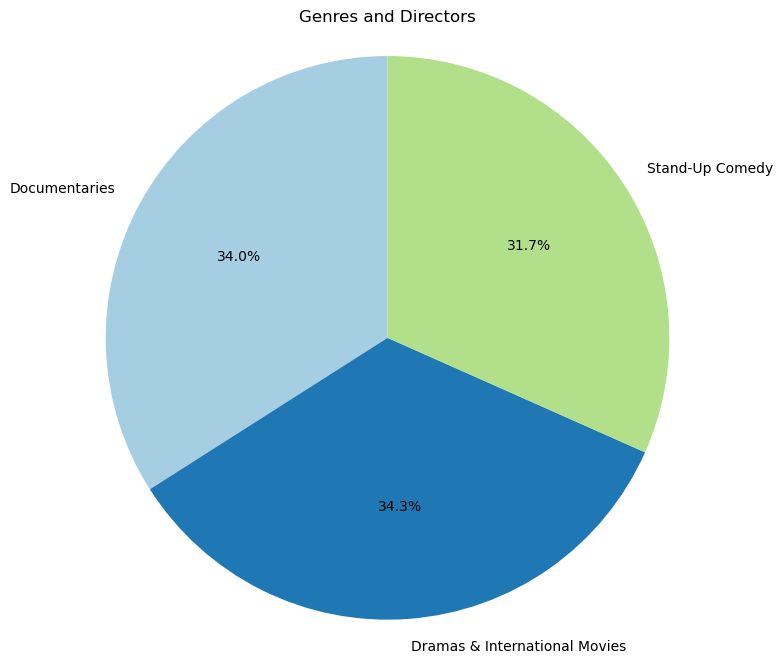

Documentaries - Director: Vlad Yudin - Movies/TV Shows Produced: 359
Dramas & International Movies - Director: Youssef Chahine - Movies/TV Shows Produced: 362
Stand-Up Comedy - Director: Raúl Campos, Jan Suter - Movies/TV Shows Produced: 334


In [11]:
# Manually input the data
genres = ['Documentaries', 'Dramas & International Movies', 'Stand-Up Comedy']
director_counts = [359, 362, 334]  # Corresponding counts for each genre
directors = ['Vlad Yudin', 'Youssef Chahine', 'Raúl Campos, Jan Suter']  # The most frequent directors for each genre

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(director_counts, labels=genres, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Genres and Directors')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart as an image in memory
img = io.BytesIO()
plt.savefig(img, format='png')
img.seek(0)

# Show the pie chart
plt.show()

# Print out the data for the user
for genre, director, count in zip(genres, directors, director_counts):
    print(f"{genre} - Director: {director} - Movies/TV Shows Produced: {count}")